In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\data\CardData_new.csv', encoding='cp949')
df.head(50)

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속
5,mrILBIsf,1,38,1,20180201,11,0,0,0,0,...,9,7,7,0,4,4,3,0,0,21.Active_연속
6,w8NeFjRo,2,38,1,20170609,19,1,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
7,G5RWJoOf,1,26,1,20170504,20,0,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
8,9QifHQRq,2,38,1,20120822,77,0,0,0,0,...,1,1,1,1,0,0,0,12,12,34.휴면_9M+
9,OdlqFy2F,2,42,1,20100816,101,0,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속


In [3]:
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [19]:
def month_to_number(month):
    month_dict = {
        '21.Active_연속': 2, '34.휴면_9M+': 0, '31.휴면_3M': 0, '33.휴면_9M-': 0,
        '22.Active_간헐': 1, '32.휴면_6M-': 0
    }
    return month_dict.get(month, month)  # 딕셔너리에 없는 값이면 그대로 반환

df['고객구분'] = df['고객구분'].apply(month_to_number)

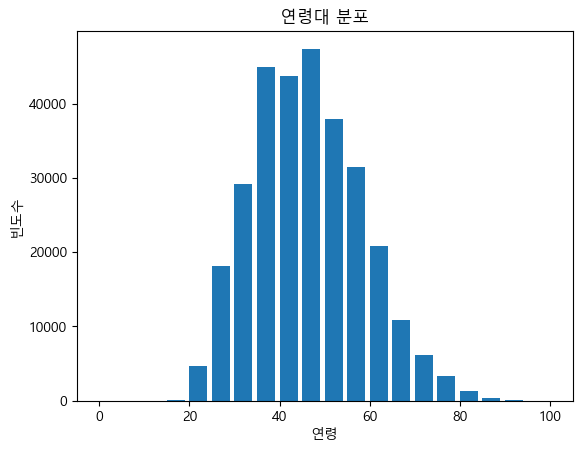

In [4]:
plt.hist(data=df, x='연령', bins=20, range=(0, 100),width  = 4)
plt.xlabel('연령')
plt.ylabel('빈도수')
plt.title('연령대 분포')
plt.show()

In [10]:
# 연령대 나누기
def get_age_group(age):
    if age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'
# '연령대' 열 추가
df['연령대'] = df['연령'].apply(get_age_group)
df['연령대'].value_counts()

40대       91043
30대       74047
50대       69369
60대 이상    42718
20대       22823
Name: 연령대, dtype: int64

In [11]:
df['_1순위카드이용금액'].describe()

count    3.000000e+05
mean     1.522919e+06
std      3.754540e+06
min     -8.651377e+06
25%      1.840000e+04
50%      7.350000e+05
75%      1.951652e+06
max      1.061446e+09
Name: _1순위카드이용금액, dtype: float64

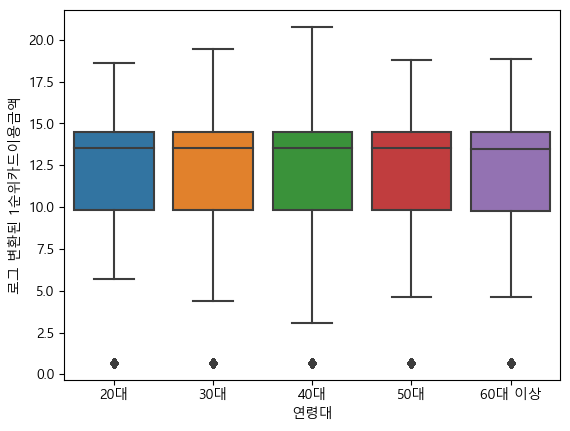

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['_1순위카드이용금액'].apply(lambda x: max(x, 1)))

# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액_log', order=['20대','30대','40대','50대','60대 이상'])
plt.ylabel('로그 변환된 1순위카드이용금액')
plt.show()

<Axes: xlabel='고객구분', ylabel='_1순위카드이용금액_log'>

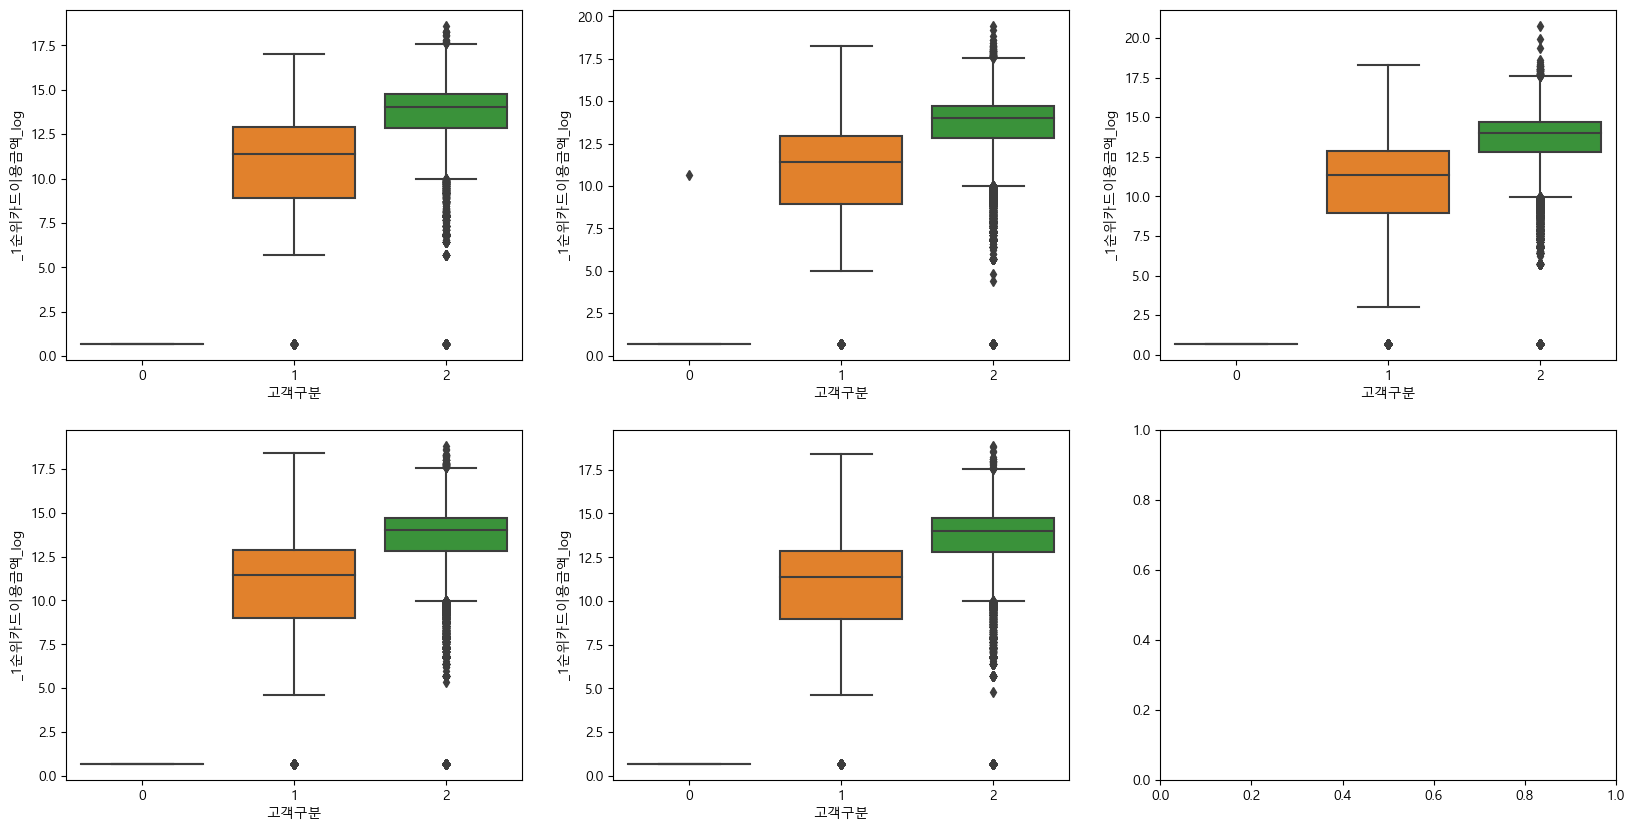

In [36]:

fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))



# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['_1순위카드이용금액'].apply(lambda x: max(x, 1)))

sns.boxplot(df[df['연령대'] == '20대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[0, 0])
sns.boxplot(df[df['연령대'] == '30대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[0, 1])
sns.boxplot(df[df['연령대'] == '40대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[0, 2])
sns.boxplot(df[df['연령대'] == '50대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[1, 0])
sns.boxplot(df[df['연령대'] == '60대 이상'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[1, 1])

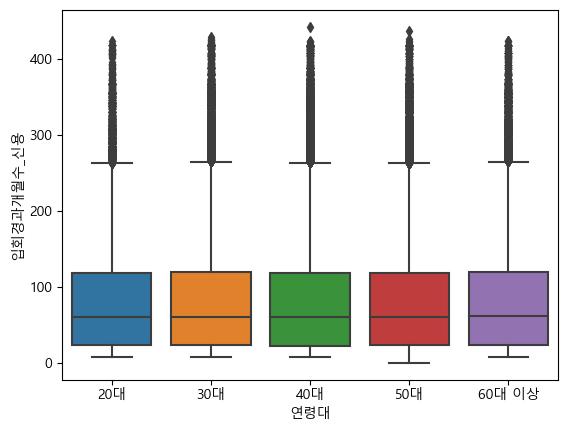

In [24]:


# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='입회경과개월수_신용', order=['20대','30대','40대','50대','60대 이상'])
plt.ylabel('입회경과개월수_신용')
plt.show()

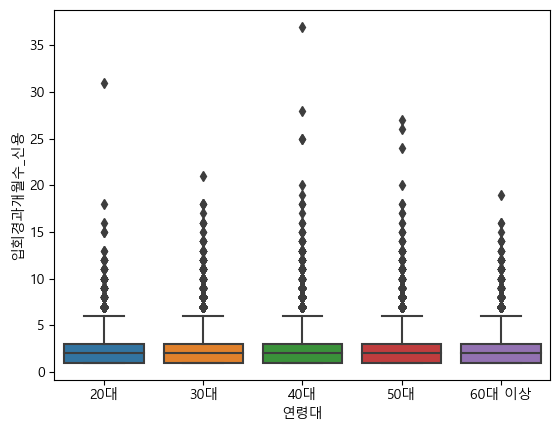

In [26]:
sns.boxplot(data=df, x='연령대', y='유효카드수_신용체크', order=['20대','30대','40대','50대','60대 이상'])
plt.ylabel('입회경과개월수_신용')
plt.show()

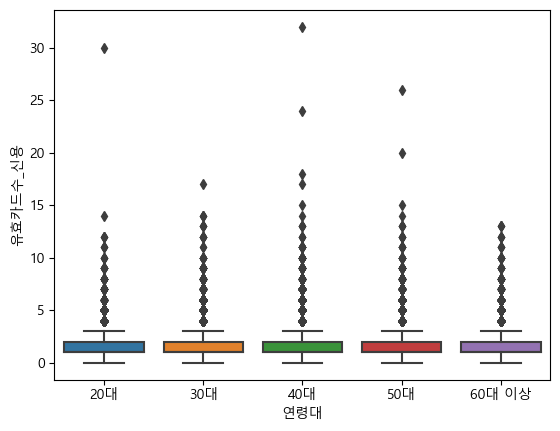

In [27]:
sns.boxplot(data=df, x='연령대', y='유효카드수_신용', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

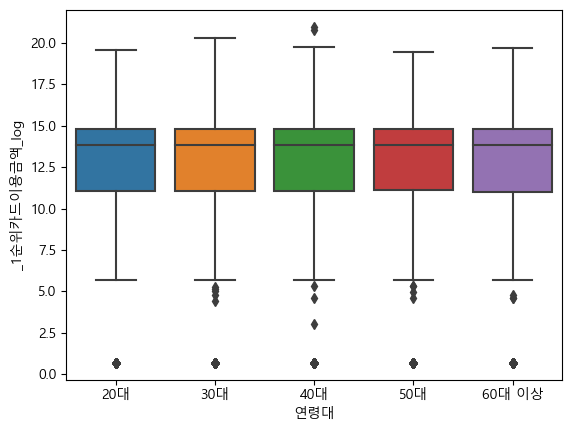

In [30]:
# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['이용금액_R3M_신용체크'].apply(lambda x: max(x, 1)))

# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액_log', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

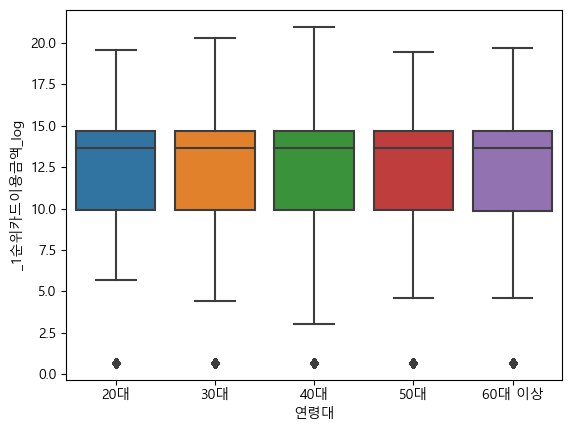

In [31]:
# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['이용금액_R3M_신용'].apply(lambda x: max(x, 1)))

# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액_log', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

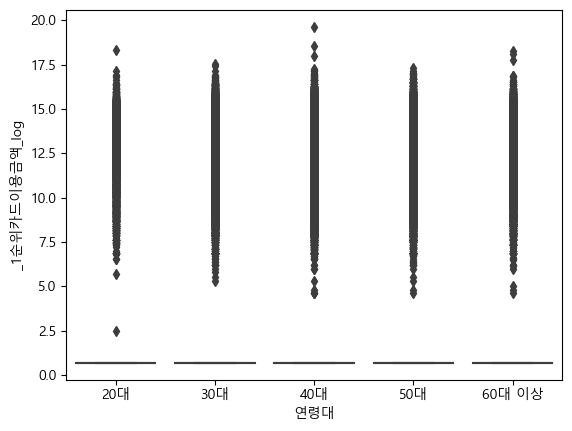

In [32]:
# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['이용금액_R3M_체크'].apply(lambda x: max(x, 1)))

# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액_log', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

<Axes: xlabel='고객구분', ylabel='_1순위카드이용건수'>

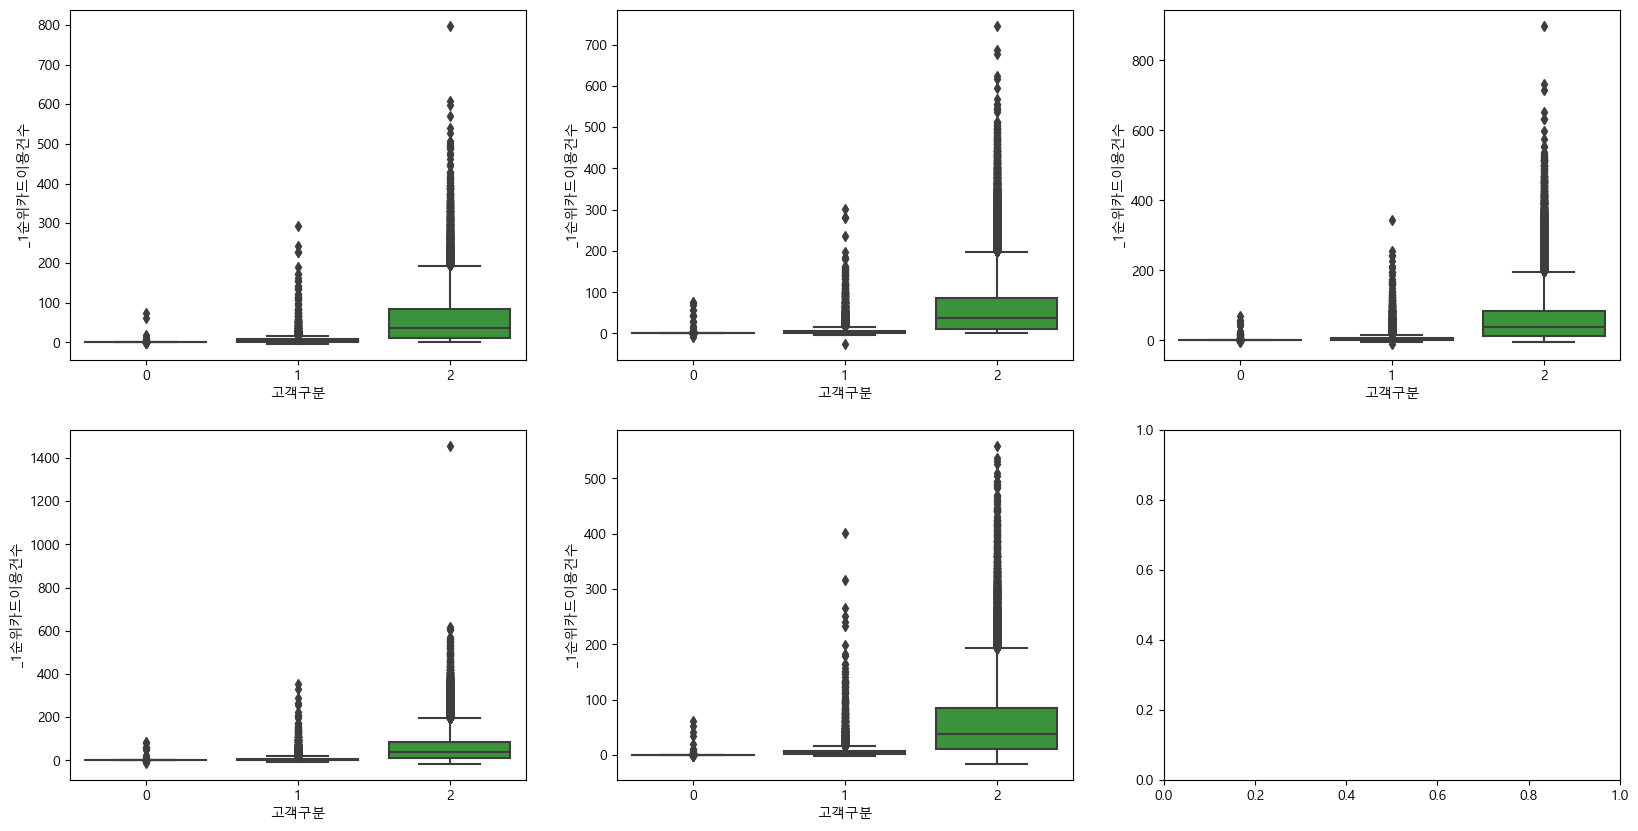

In [35]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))


sns.boxplot(df[df['연령대'] == '20대'], x = '고객구분', y = '_1순위카드이용건수', ax = ax[0, 0])
sns.boxplot(df[df['연령대'] == '30대'], x = '고객구분', y = '_1순위카드이용건수', ax = ax[0, 1])
sns.boxplot(df[df['연령대'] == '40대'], x = '고객구분', y = '_1순위카드이용건수', ax = ax[0, 2])
sns.boxplot(df[df['연령대'] == '50대'], x = '고객구분', y = '_1순위카드이용건수', ax = ax[1, 0])
sns.boxplot(df[df['연령대'] == '60대 이상'], x = '고객구분', y = '_1순위카드이용건수', ax = ax[1, 1])

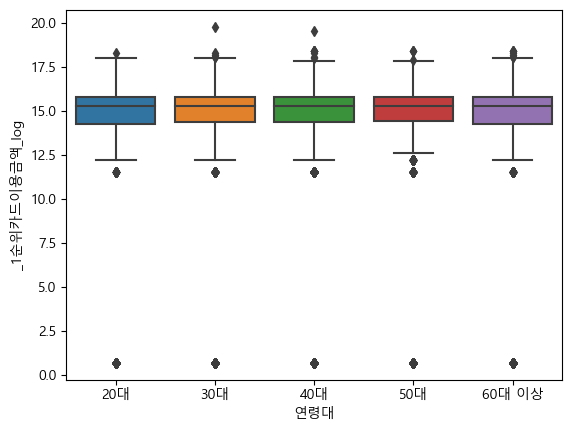

In [37]:
# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['카드이용한도금액'].apply(lambda x: max(x, 1)))

# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액_log', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

<Axes: xlabel='고객구분', ylabel='_1순위카드이용금액_log'>

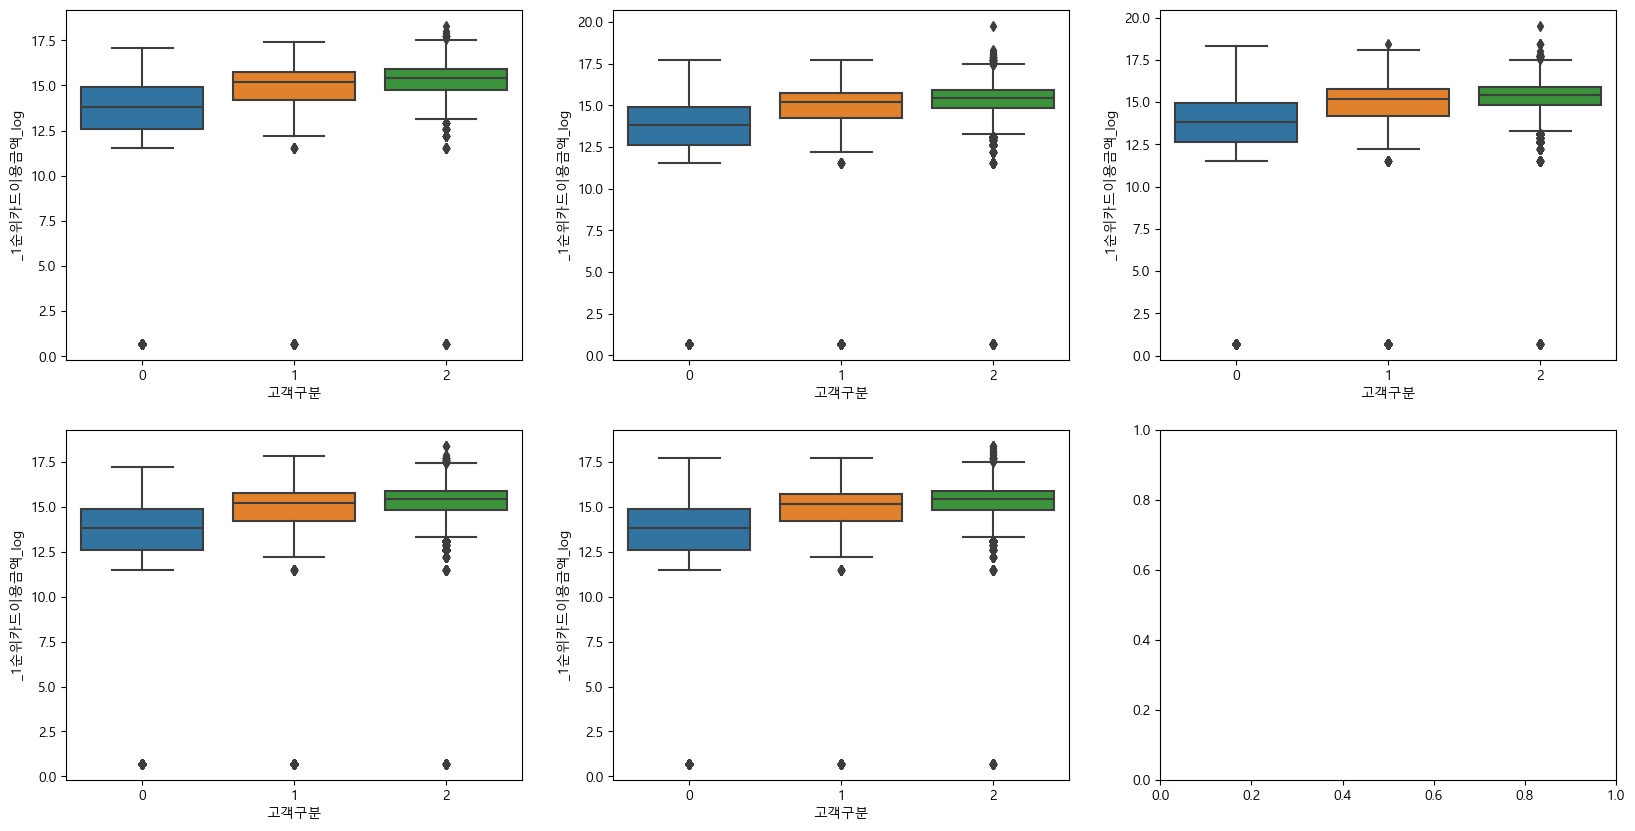

In [39]:

fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))



# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['카드이용한도금액'].apply(lambda x: max(x, 1)))

sns.boxplot(df[df['연령대'] == '20대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[0, 0])
sns.boxplot(df[df['연령대'] == '30대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[0, 1])
sns.boxplot(df[df['연령대'] == '40대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[0, 2])
sns.boxplot(df[df['연령대'] == '50대'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[1, 0])
sns.boxplot(df[df['연령대'] == '60대 이상'], x = '고객구분', y = '_1순위카드이용금액_log', ax = ax[1, 1])

<Axes: xlabel='고객구분', ylabel='이용건수_신용_B0M'>

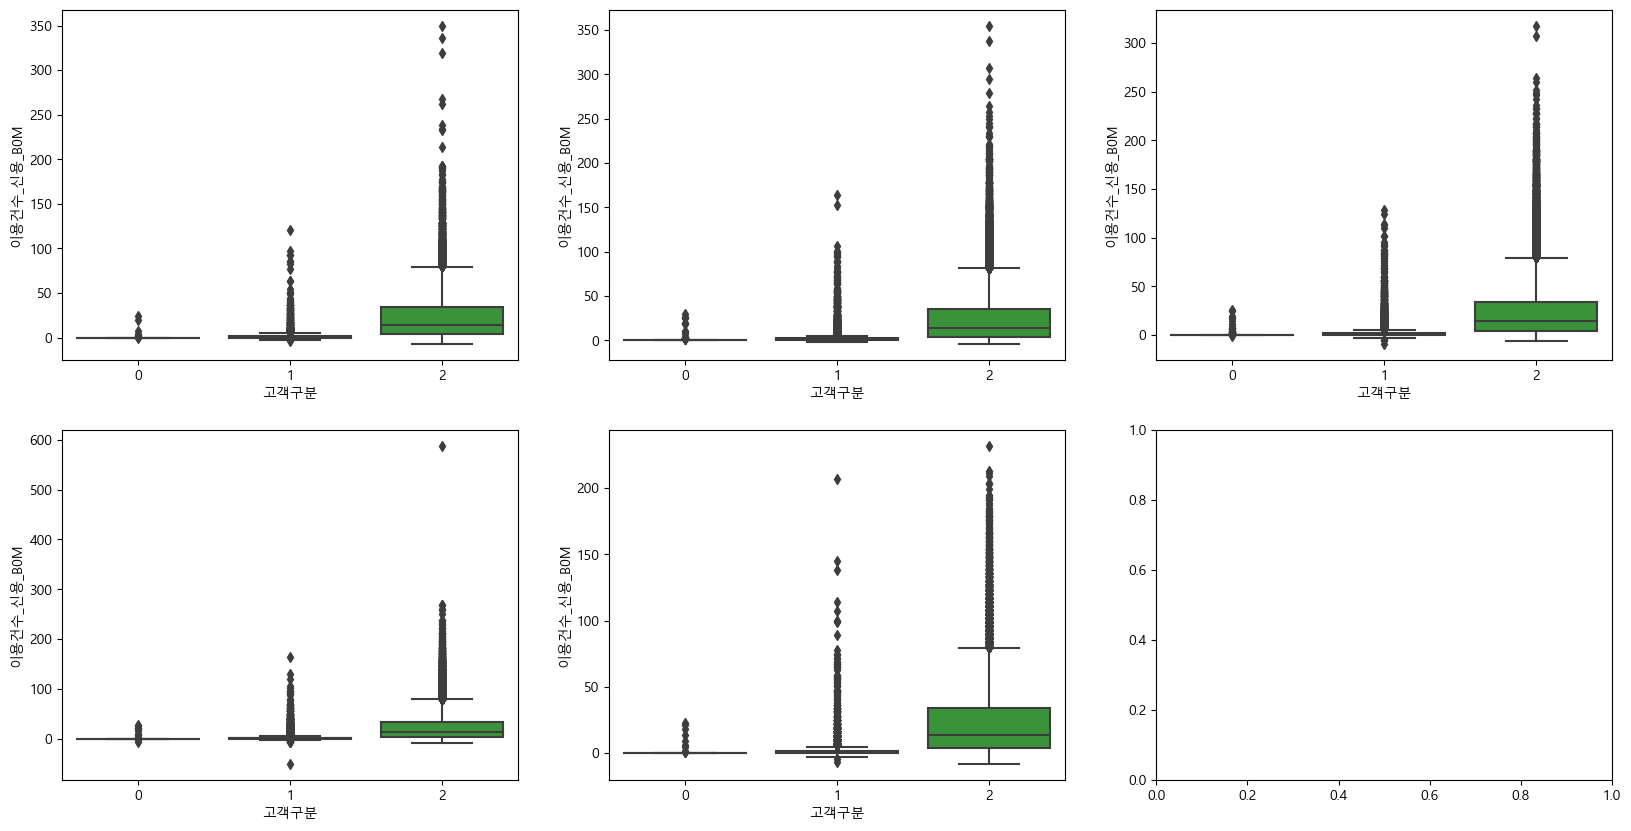

In [42]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))

sns.boxplot(df[df['연령대'] == '20대'], x = '고객구분', y = '이용건수_신용_B0M', ax = ax[0, 0])
sns.boxplot(df[df['연령대'] == '30대'], x = '고객구분', y = '이용건수_신용_B0M', ax = ax[0, 1])
sns.boxplot(df[df['연령대'] == '40대'], x = '고객구분', y = '이용건수_신용_B0M', ax = ax[0, 2])
sns.boxplot(df[df['연령대'] == '50대'], x = '고객구분', y = '이용건수_신용_B0M', ax = ax[1, 0])
sns.boxplot(df[df['연령대'] == '60대 이상'], x = '고객구분', y = '이용건수_신용_B0M', ax = ax[1, 1])

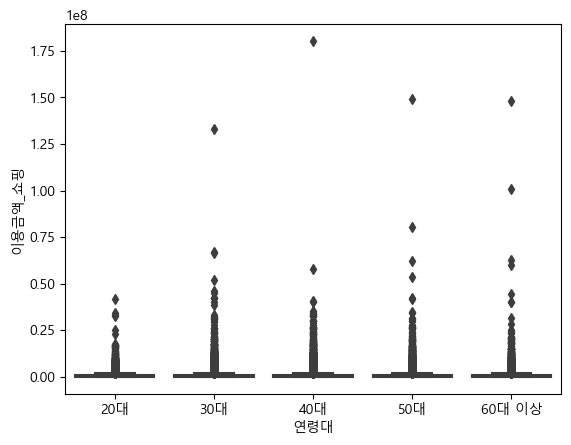

In [44]:
# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='이용금액_쇼핑', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

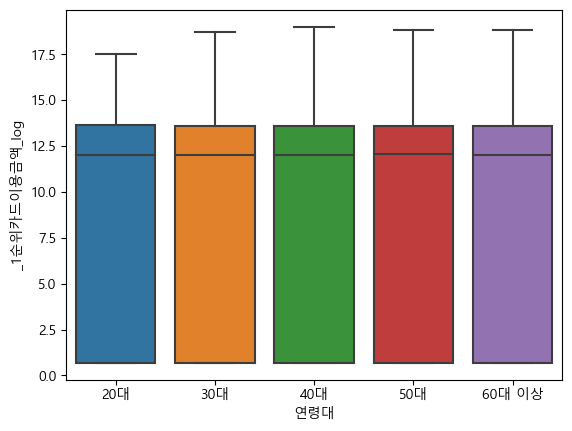

In [45]:


# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['이용금액_쇼핑'].apply(lambda x: max(x, 1)))

# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액_log', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

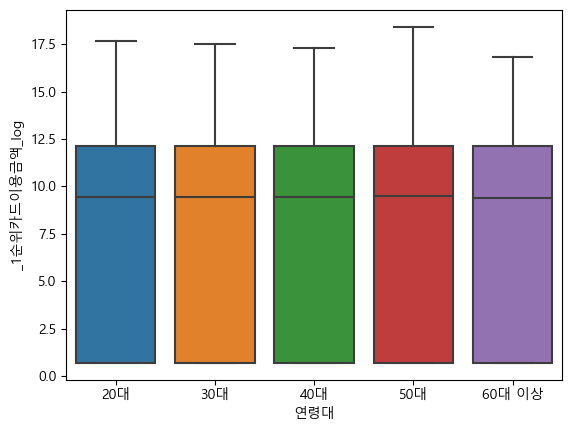

In [56]:


# 로그 변환을 적용할 때 0이나 음수 값을 가지는 경우를 처리하여 '_1순위카드이용금액_log' 열을 생성
df['_1순위카드이용금액_log'] = np.log1p(df['이용금액_교통'].apply(lambda x: max(x, 1)))

# 연령대 별 '_1순위카드이용금액'의 로그 변환된 값의 분포 시각화
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액_log', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

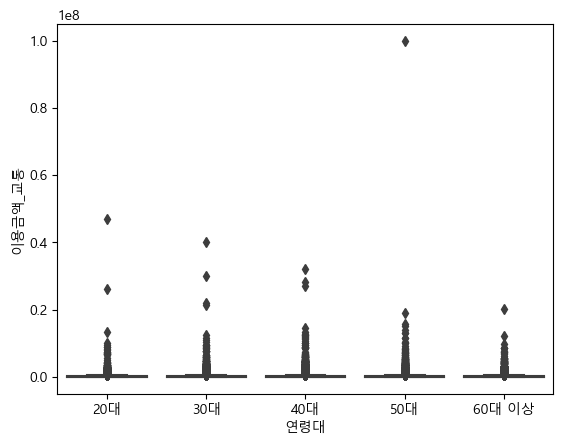

In [55]:
sns.boxplot(data=df, x='연령대', y='이용금액_교통', order=['20대','30대','40대','50대','60대 이상'])
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

C:\Users\shinseungho\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\shinseungho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


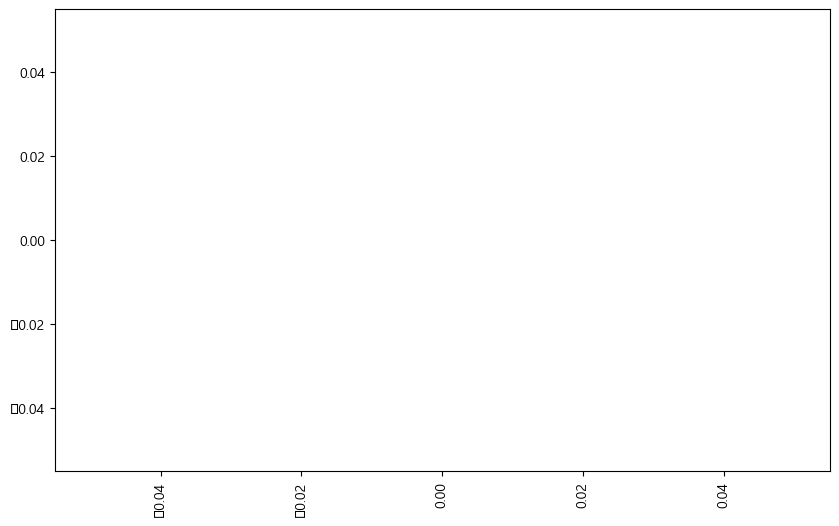

In [57]:
result = df.loc[df['자격기준'] == '20대', '이용금액대'].value_counts().sort_index()

plt.figure(figsize = (10,6))
result.plot(kind = 'bar')
plt.xlabel('이용금액대')
plt.ylabel('개수')
plt.title('언론기관 이용금액대 분포')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
#용재방법따라하기

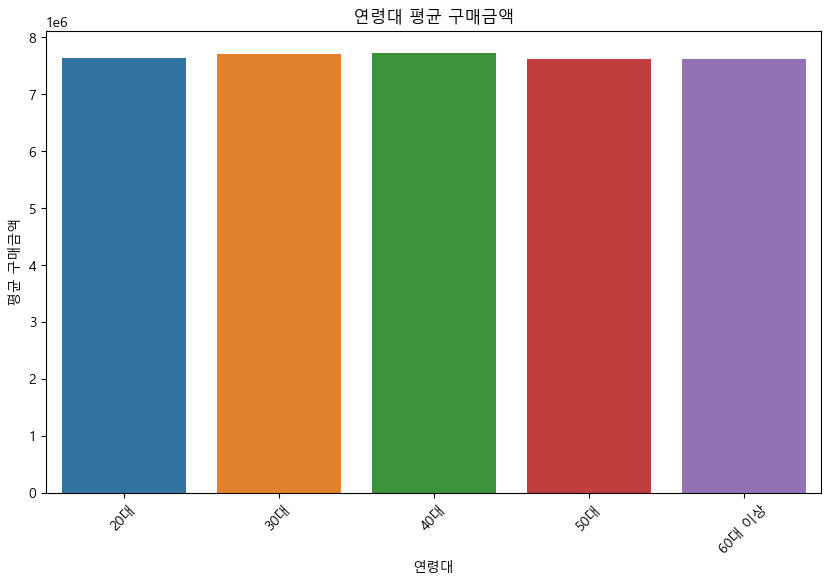

In [50]:
avg = df.groupby('연령대')['이용금액_신용_R12M'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg.values)
plt.xlabel('연령대')
plt.ylabel('평균 구매금액')
# plt.ylim(min(avg.values),max(avg.values))
plt.title('연령대 평균 구매금액')
plt.xticks(rotation=45)

plt.show()

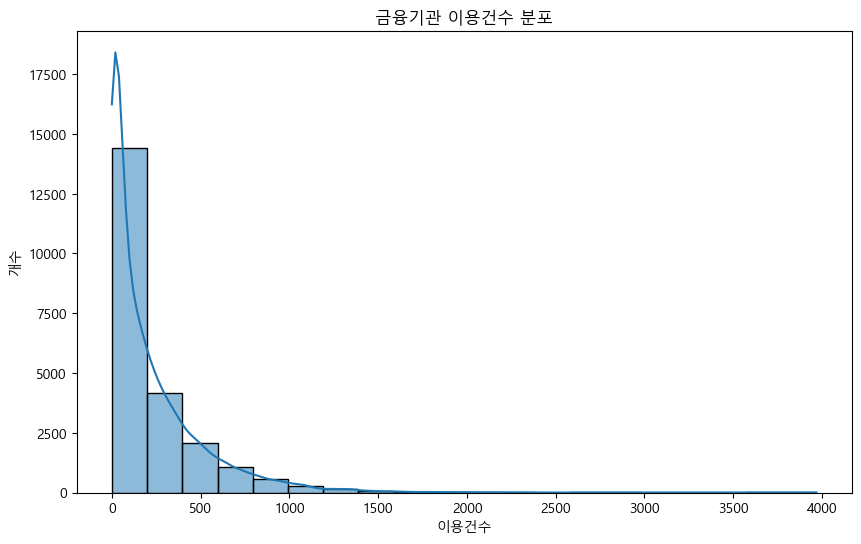

In [51]:
use = df.loc[df['연령대'] == '20대', '이용건수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(use, bins=20, kde=True) 
plt.xlabel('이용건수')
plt.ylabel('개수')
plt.title('20대 분포')
plt.show()

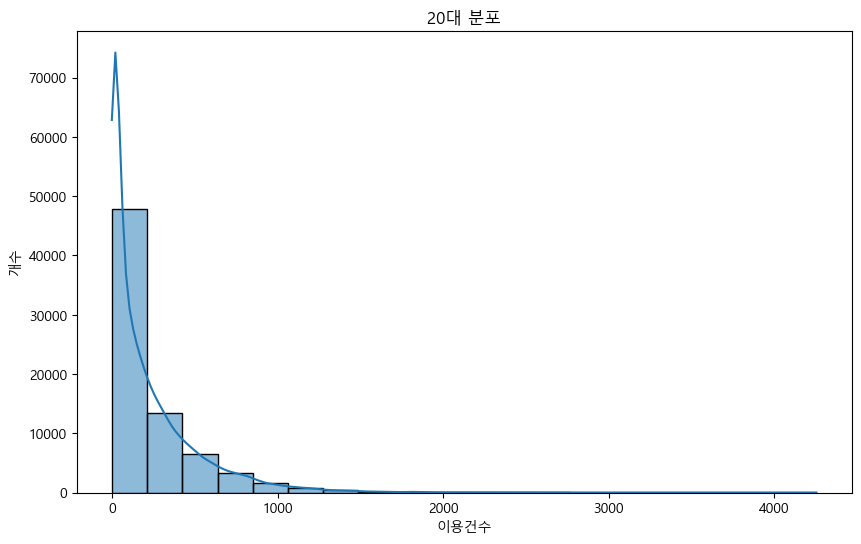

In [52]:
use = df.loc[df['연령대'] == '30대', '이용건수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(use, bins=20, kde=True) 
plt.xlabel('이용건수')
plt.ylabel('개수')
plt.title('20대 분포')
plt.show()

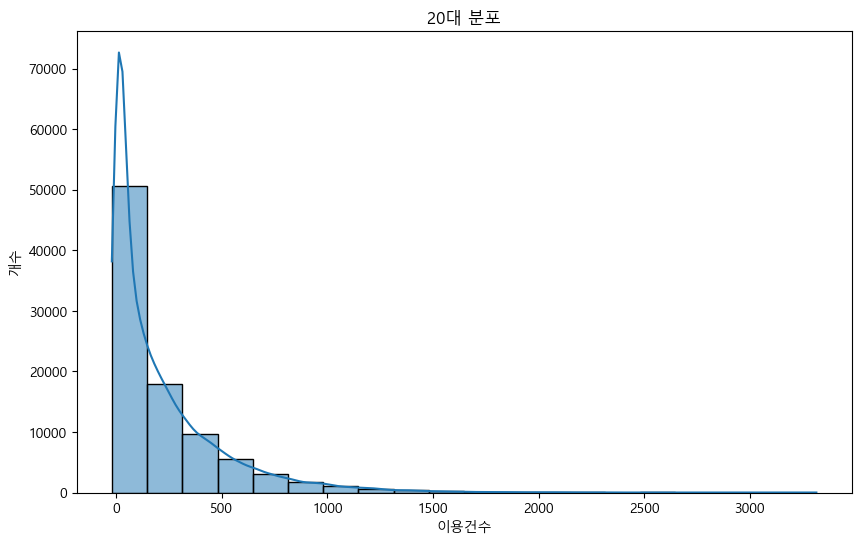

In [54]:
use = df.loc[df['연령대'] == '40대', '이용건수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(use, bins=20, kde=True) 
plt.xlabel('이용건수')
plt.ylabel('개수')
plt.title('20대 분포')
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

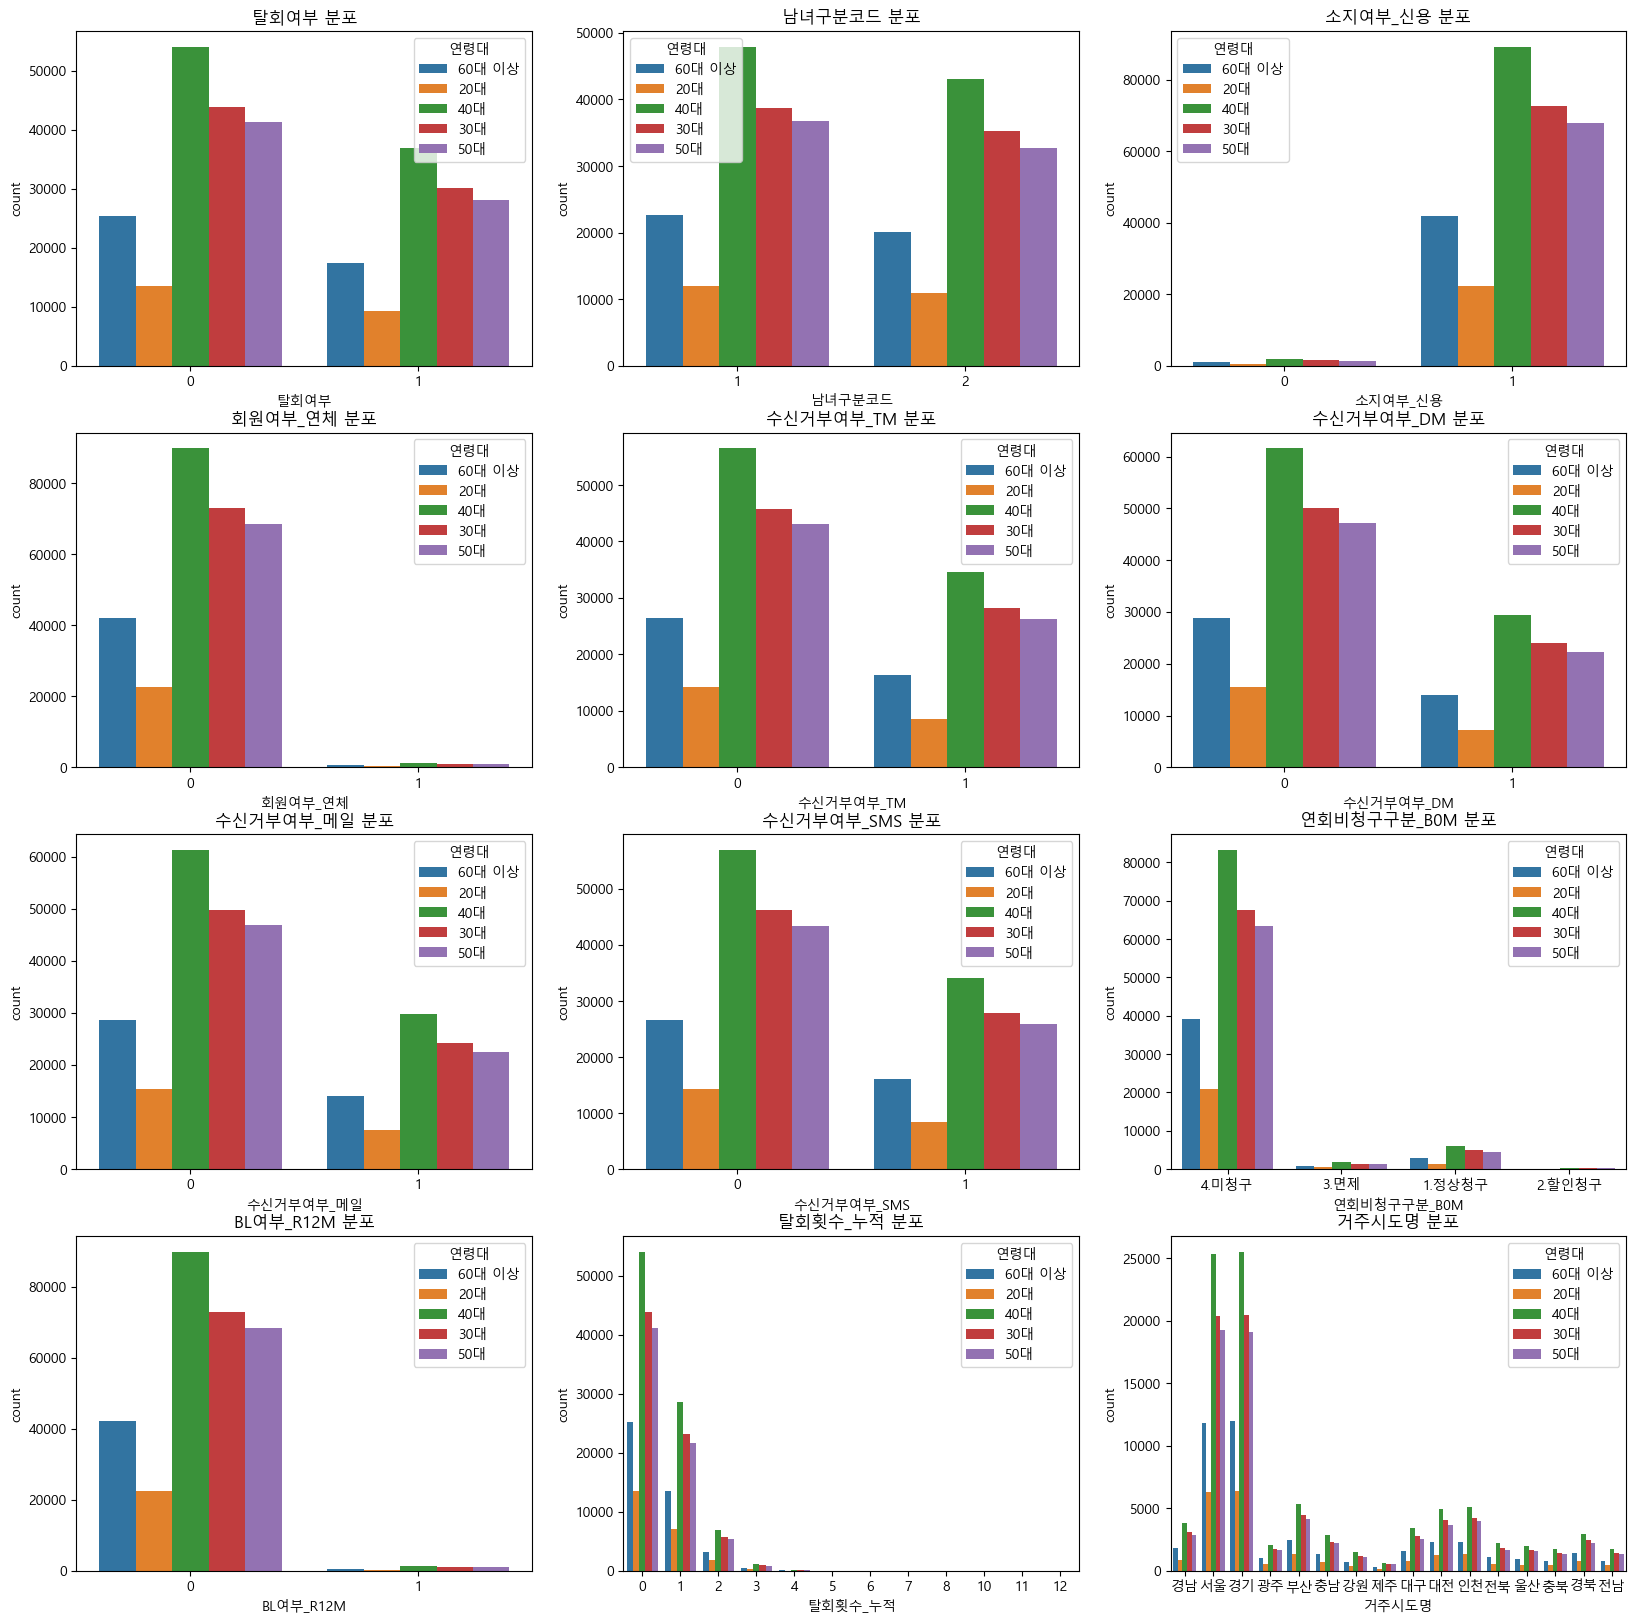

In [58]:
# 분석에 사용할 컬럼 목록
columns_to_analyze = [
    '탈회여부', '남녀구분코드', '소지여부_신용', '회원여부_연체', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일',
    '수신거부여부_SMS', '연회비청구구분_B0M', 'BL여부_R12M', '탈회횟수_누적', '거주시도명', '거주시군구명', '직장시도명',
    '직장시군구명', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크'
    
]

# 그래프의 행, 열 개수
n_rows = 4
n_cols = 3

# 그래프 크기 설정
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

# 변수 목록을 반복하면서 그래프 그리기
for idx, column in enumerate(columns_to_analyze):
    row = idx // n_cols
    col = idx % n_cols
    
    ax = axes[row, col]
    
    sns.countplot(data=df, x=column, hue='연령대', ax=ax)
    ax.set_title(f'{column} 분포')

plt.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

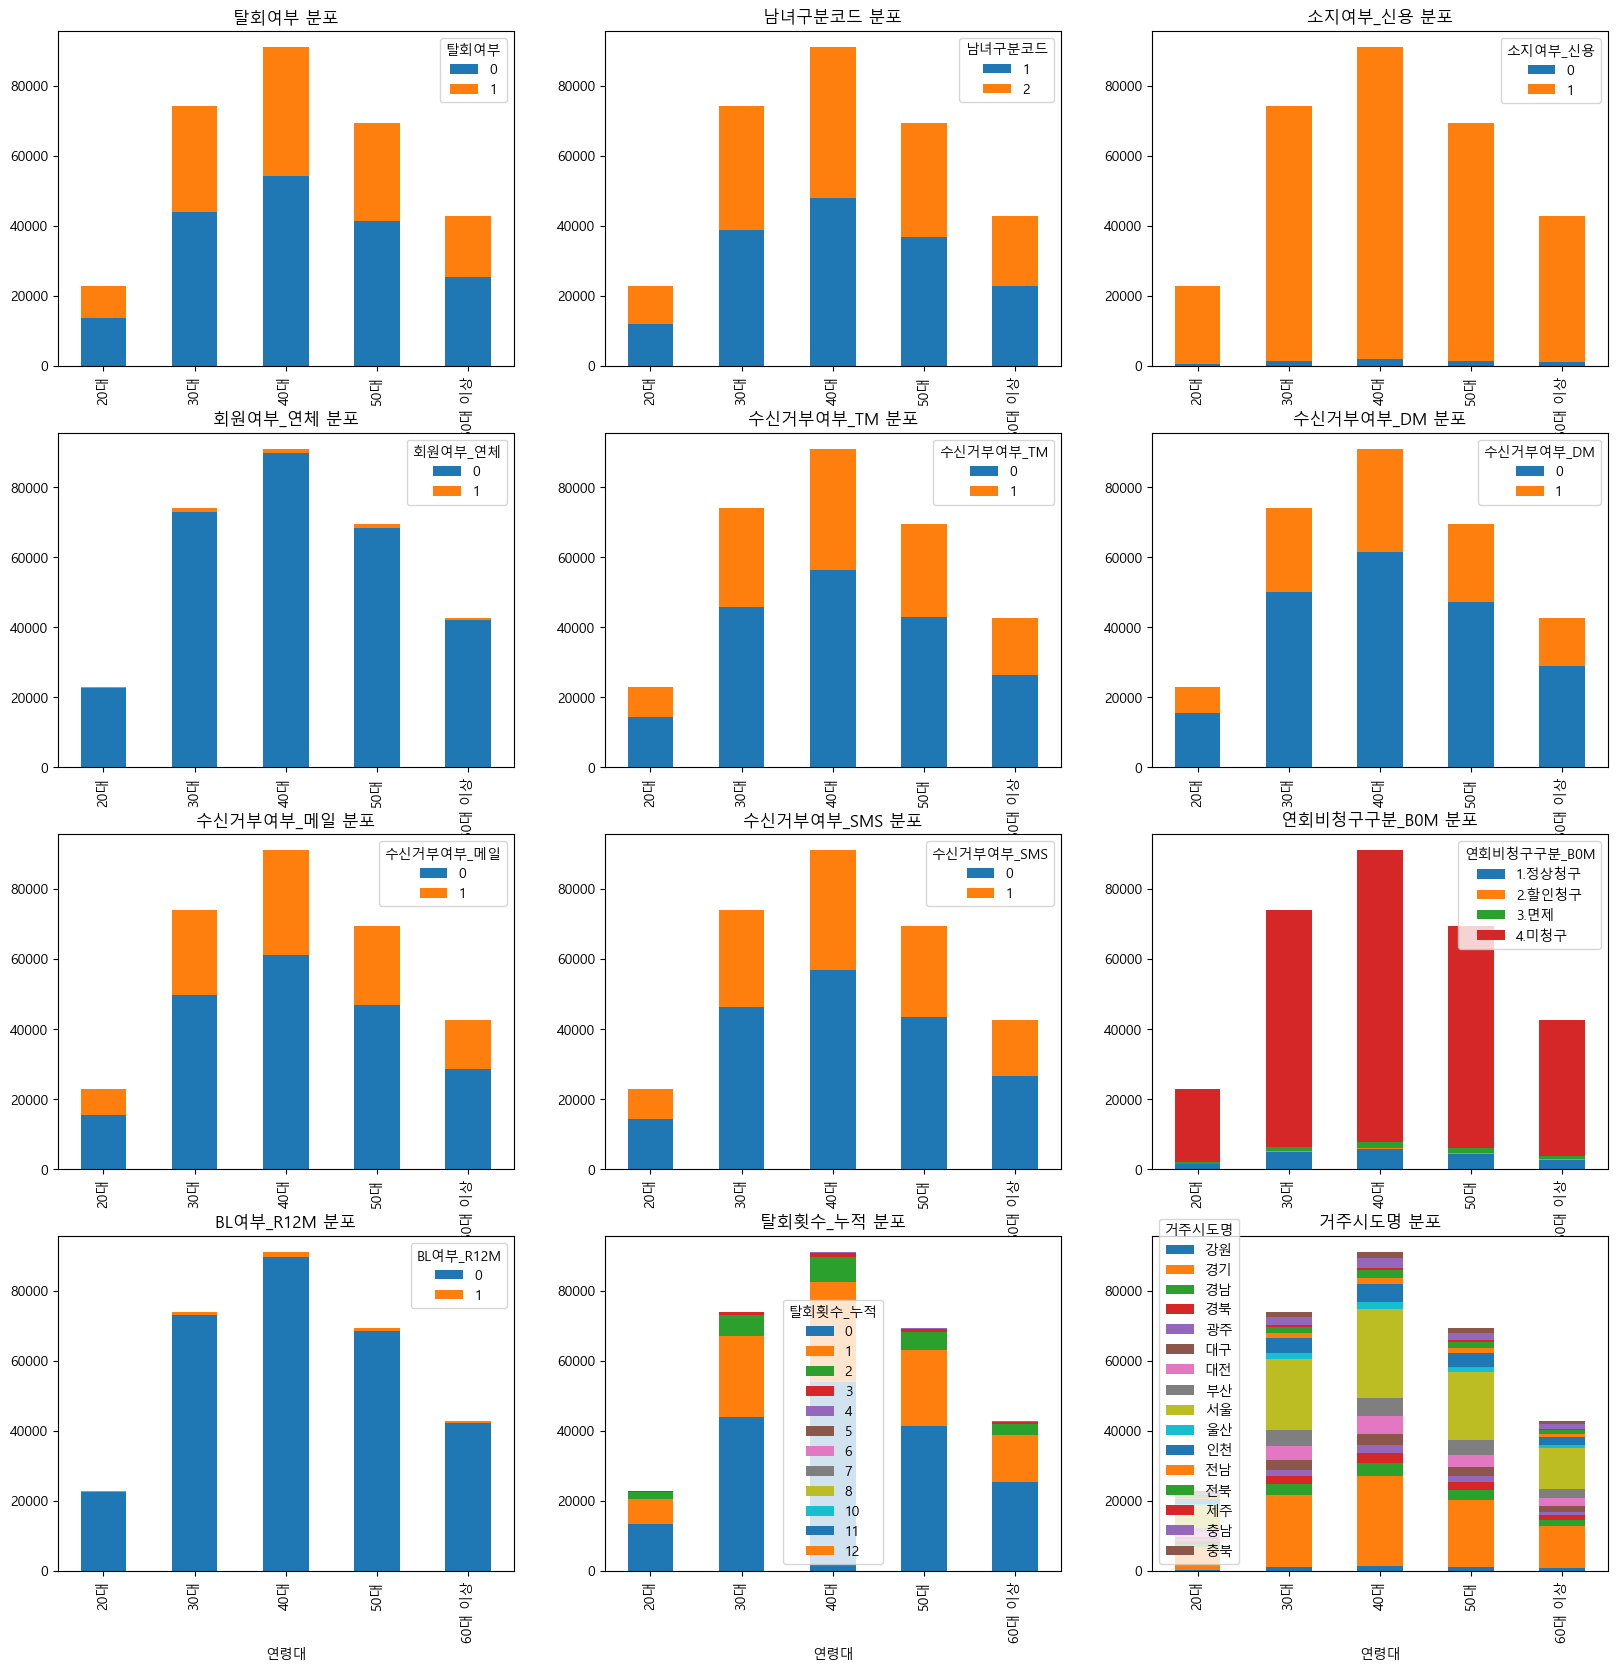

In [59]:
# 분석에 사용할 컬럼 목록
columns_to_analyze = [
    '탈회여부', '남녀구분코드', '소지여부_신용', '회원여부_연체', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일',
    '수신거부여부_SMS', '연회비청구구분_B0M', 'BL여부_R12M', '탈회횟수_누적', '거주시도명', '거주시군구명', '직장시도명',
    '직장시군구명', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크'
    # 나머지 분석에 사용할 컬럼들을 추가하세요
]

# 그래프의 행, 열 개수
n_rows = 4
n_cols = 3

# 그래프 크기 설정
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

# 변수 목록을 반복하면서 그래프 그리기
for idx, column in enumerate(columns_to_analyze):
    row = idx // n_cols
    col = idx % n_cols
    
    ax = axes[row, col]
    
    plt_data = df.groupby(['연령대', column]).size().unstack()
    plt_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{column} 분포')

plt.tight_layout()
plt.show()

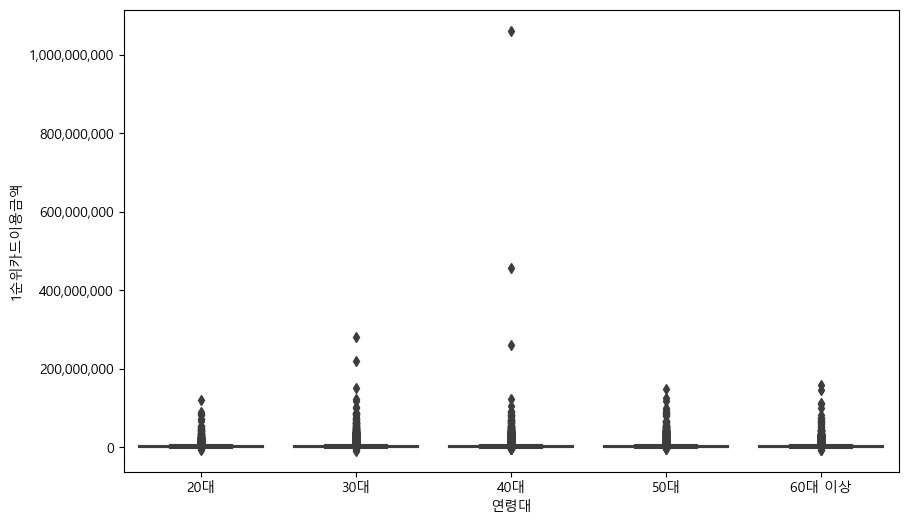

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 그래프 생성 및 설정
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='연령대', y='_1순위카드이용금액', order=['20대', '30대', '40대', '50대', '60대 이상'], ax=ax)

# 축 레이블 숫자 형식 지정
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

plt.ylabel('1순위카드이용금액')
plt.show()